In [9]:
import pysr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 0.5

In [4]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [5]:
model.fit(X, y)

C:\Users\theowolf\anaconda3\envs\torch_env\lib\site-packages\pysr\sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          4.1805015   
	1         1.107083                                          (x0 * x0)   
	2         0.001237                            ((x0 * 0.9869162) * x0)   
	3         0.960104                              ((x0 * x0) + cos(x3))   
	4         0.793615                ((x0 * x0) + (cos(x3) * 2.3477585))   
	5         0.009288            ((x0 * x0) + (sin(cos(x3)) * 2.674943))   
	6        27.422654       ((x0 * x0) + ((cos(x3) * 2.5382001) + -0.5))   
	7         0.016198  ((x0 * x0) + (((cos(x3) * 1.6765549) * 1.51393...   
	8         0.067533  ((x0 * (x0 * inv(1.0))) + ((cos(x3) * 2.538200...   
	9  >>>>   0.157685  (((x0 * x0) + ((cos(x3) + -0.22344112) * 2.538...   
	
	           loss  complexity  
	0  2.719070e+01           1  
	1  2.970439e+00           3  
	2  2.963096e+00           5  
	3  1.134430e+00           6  
	4  2.319809e-01           8  
	5  2.298363e-01           9  
	6  2.830815e-13          10  
	7  2.740576e-13          12  
	8  2.561608e-13          13  
	9  1.868740e-13          15  
]

In [6]:
print(model)

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          4.1805015   
	1         1.107083                                          (x0 * x0)   
	2         0.001237                            ((x0 * 0.9869162) * x0)   
	3         0.960104                              ((x0 * x0) + cos(x3))   
	4         0.793615                ((x0 * x0) + (cos(x3) * 2.3477585))   
	5         0.009288            ((x0 * x0) + (sin(cos(x3)) * 2.674943))   
	6        27.422654       ((x0 * x0) + ((cos(x3) * 2.5382001) + -0.5))   
	7         0.016198  ((x0 * x0) + (((cos(x3) * 1.6765549) * 1.51393...   
	8         0.067533  ((x0 * (x0 * inv(1.0))) + ((cos(x3) * 2.538200...   
	9  >>>>   0.157685  (((x0 * x0) + ((cos(x3) + -0.22344112) * 2.538...   
	
	           loss  complexity  
	0  2.719070e+01           1  
	1  2.970439e+00           3  
	2  2.963096e+00           5  
	3  1.134430e+00           6  


In [8]:
model.sympy()

x0**2 + 2.5382001*cos(x3) - 0.499999850616339

In [13]:
from src.cooling import diff_equations

In [33]:
T0 = 100
Tenv = 25
R = 0.05
time = np.linspace(0, 1000, 1000)
Ts = diff_equations.cooling_law(time, Tenv, T0, R)

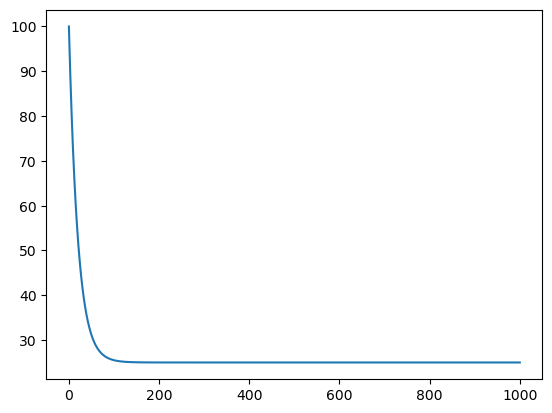

In [34]:
plt.plot(time, Ts)

$$T = T_{env} + (T_0-T_{env})e^{-Rt}$$

In [38]:
model1 = PySRRegressor(
    niterations=1000,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        # "cos",
        "exp",
        # "sin",
        # "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    # extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [39]:
model1.fit(time.reshape(-1,1), Ts.reshape(-1, 1))

C:\Users\theowolf\anaconda3\envs\torch_env\lib\site-packages\pysr\sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          26.536383   
	1         0.030574                  ((-0.008840026 * x0) + 30.956694)   
	2         0.013203              (32.07935 * exp(-0.00036849713 * x0))   
	3         1.883605          (25.494444 * exp(exp(-0.023698073 * x0)))   
	4        13.005202  ((75.05148 * exp(-0.050036505 * x0)) + 24.998533)   
	5         0.276458  (((75.22029 + -0.19764063) * exp(-0.050036505 ...   
	6         0.641018  ((75.22029 * exp(-0.050036505 * ((x0 * 0.99940...   
	7  >>>>   1.172352  ((75.22029 * exp(-0.050036505 * ((x0 * 0.99940...   
	8         0.005809  (((75.22029 * exp(-0.050036505 * ((x0 * 0.9994...   
	9         0.019512  (((75.22029 * exp(-0.050036505 * ((x0 * 0.9994...   
	
	           loss  complexity  
	0  5.669285e+01           1  
	1  5.016682e+01           5  
	2  4.950882e+01           6  
	3  7.527368e+00           7  
	4  1.692605e-05           8  
	5  9.737050e-06          10  
	6  2.701759e-06          12  
	7  2.590326e-07          14  
	8  2.560408e-07          16  
	9  2.414833e-07          19  
]

In [40]:
model1.sympy()

24.9999654194 + 75.004550915297*exp(-0.0500065196236487*x0)